In [1]:
import faker
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

- Produkt-Nummer
- Kundenname
- Adresse
- Preis
- Menge
- Sales Person
- Datum

In [192]:
## Initialize Faker
fake = faker.Faker('de_DE')
fake.seed_instance(123)

## Generate transaction data
transactions_per_sales = [300, 200, 250, 250]
n_sales_reps = len(transactions_per_sales)
n_sales = sum(transactions_per_sales)
product_ids, prices = [1,2,3,4,5,6], [12.99, 41.23, 45.89, 123.39, 987.45, 3.45]
id2price = {p_id:price for p_id, price in zip(product_ids,prices )}
sales = [fake.name() for _ in range(n_sales_reps)]

name_first = [fake.first_name() for _ in range(n_sales)]
name_last = [fake.last_name() for _ in range(n_sales)]

email = []
for first, last in zip(name_first, name_last):
    first, last = first.lower(), last.lower()
    if " " in first: first = "_".join(first.split(" "))
    if " " in last: last = "_".join(last.split(" "))
        
    email.append(f"{first}.{last}@{fake.free_email_domain()}")


products = np.random.choice(product_ids, size=n_sales)
rep_per_sale = np.random.choice(sales, size=n_sales, p=np.array(transactions_per_sales)/n_sales)
units = np.random.randint(1,10,size=n_sales)
iban = [fake.iban() for _ in range(n_sales)]

start, end = pd.to_datetime("09-01-2022"), pd.to_datetime("09-30-2022")
dates = [fake.date_between_dates(start, end) for _ in range(n_sales)]

In [193]:
data = {
      "Datum": dates,
      "Name1": name_first, 
      "Name 2": name_last, 
      "i_ban": iban, 
      "email": email, <<
      "product_id":products,
      "Menge": units,
      "Vertriebler": rep_per_sale}

In [198]:
df = (pd.DataFrame(data)
      .assign(#Preis=lambda _df: _df["product_id"].replace(id2price), 
              Datum=lambda _df: pd.to_datetime(_df["Datum"]).dt.normalize(), 
              Menge= lambda _df: _df.where(~((_df["Datum"].dt.weekday == 5) & (_df["Vertriebler"] == sales[0]) | (_df["Datum"].dt.weekday == 6) & (_df["Vertriebler"] == sales[0])), #(_df["Datum"].dt.weekday != 6) ,
                                             _df["Menge"] * np.random.choice([2,3,4,5], size=n_sales), axis=0)["Menge"], 
              Wochentag=lambda _df: _df["Datum"].dt.weekday, 
              #Umsatz=lambda _df: _df["Preis"] * _df["Menge"]
      )
      .sort_values(by="Datum")
     )

df


,Datum,Name1,Name 2,i_ban,email,product_id,Menge,Vertriebler,Wochentag
791,2022-09-01,Gottfried,Bolnbach,DE02356997736507384909,gottfried.bolnbach@yahoo.de,3,8,Ing. Babett Bender,3
382,2022-09-01,Paul,Kade,DE08849018037397452658,paul.kade@hotmail.de,5,7,Frank-Peter Christoph,3
395,2022-09-01,Rainer,Mitschke,DE97323855202838027068,rainer.mitschke@yahoo.de,1,8,Kathrin Rose-Kade,3
818,2022-09-01,Ljiljana,Rust,DE89533286549106605720,ljiljana.rust@aol.de,4,5,Frank-Peter Christoph,3
609,2022-09-01,Susan,Rogner,DE77094227579519156690,susan.rogner@gmx.de,3,8,Silja Birnbaum,3
...,...,...,...,...,...,...,...,...,...
926,2022-09-29,Gustav,Steinberg,DE75013834888620223876,gustav.steinberg@web.de,4,1,Ing. Babett Bender,3
242,2022-09-29,Irmhild,Mende,DE93479179596741003082,irmhild.mende@gmx.de,6,5,Frank-Peter Christoph,3
180,2022-09-29,Sebastiano,Stiffel,DE65572322093320917970,sebastiano.stiffel@googlemail.com,2,2,Frank-Peter Christoph,3
864,2022-09-29,Hassan,Pechel,DE29852680154073708122,hassan.pechel@aol.de,5,7,Frank-Peter Christoph,3


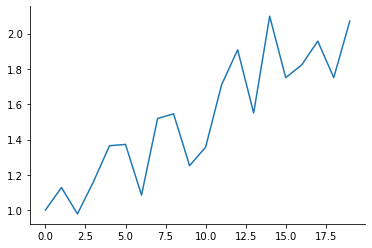

In [218]:

x = np.arange(20)
plt.plot(x, ys)
sns.despine(top=True, right=True)
#ax.spines["top"].set_visible(False)

In [224]:
def add_trend(group, top=2):
    n = len(group)
    trend = np.maximum(np.linspace(1,top,n) + np.random.randn(n)/5, 1)
    menge = trend * group
    return menge
    

In [236]:
df = df.assign(Test=df.groupby(["Vertriebler"])["Menge"].transform(add_trend))

In [237]:
df

,Datum,Name1,Name 2,i_ban,email,product_id,Menge,Vertriebler,Wochentag,Test
791,2022-09-01,Gottfried,Bolnbach,DE02356997736507384909,gottfried.bolnbach@yahoo.de,3,8,Ing. Babett Bender,3,8.000000
382,2022-09-01,Paul,Kade,DE08849018037397452658,paul.kade@hotmail.de,5,7,Frank-Peter Christoph,3,7.000000
395,2022-09-01,Rainer,Mitschke,DE97323855202838027068,rainer.mitschke@yahoo.de,1,8,Kathrin Rose-Kade,3,9.600965
818,2022-09-01,Ljiljana,Rust,DE89533286549106605720,ljiljana.rust@aol.de,4,5,Frank-Peter Christoph,3,5.250238
609,2022-09-01,Susan,Rogner,DE77094227579519156690,susan.rogner@gmx.de,3,8,Silja Birnbaum,3,8.000000
...,...,...,...,...,...,...,...,...,...,...
926,2022-09-29,Gustav,Steinberg,DE75013834888620223876,gustav.steinberg@web.de,4,1,Ing. Babett Bender,3,2.059958
242,2022-09-29,Irmhild,Mende,DE93479179596741003082,irmhild.mende@gmx.de,6,5,Frank-Peter Christoph,3,9.196612
180,2022-09-29,Sebastiano,Stiffel,DE65572322093320917970,sebastiano.stiffel@googlemail.com,2,2,Frank-Peter Christoph,3,3.792904
864,2022-09-29,Hassan,Pechel,DE29852680154073708122,hassan.pechel@aol.de,5,7,Frank-Peter Christoph,3,14.139702


<ipython-input-245-dd630e7551f4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=10)


[Text(19236.0, 0, ''),
 Text(19240.0, 0, ''),
 Text(19244.0, 0, ''),
 Text(19248.0, 0, ''),
 Text(19252.0, 0, ''),
 Text(19256.0, 0, ''),
 Text(19260.0, 0, ''),
 Text(19264.0, 0, '')]

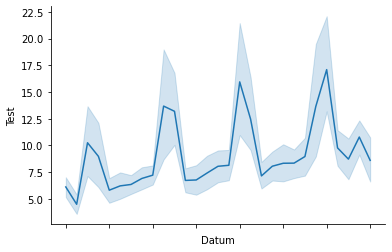

In [245]:
ax = sns.lineplot(data=df, x="Datum", y="Test")
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)

In [149]:
import seaborn as sns

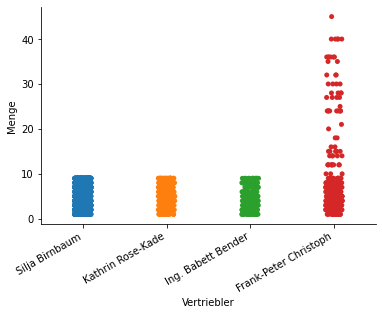

In [154]:
ax = sns.stripplot(data=df, x="Vertriebler",y="Menge", );
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
sns.despine()

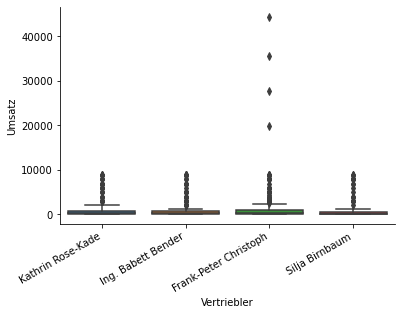

In [128]:
ax = sns.boxplot(data=df, x="Vertriebler", y="Umsatz" )#hue="Vertriebler")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

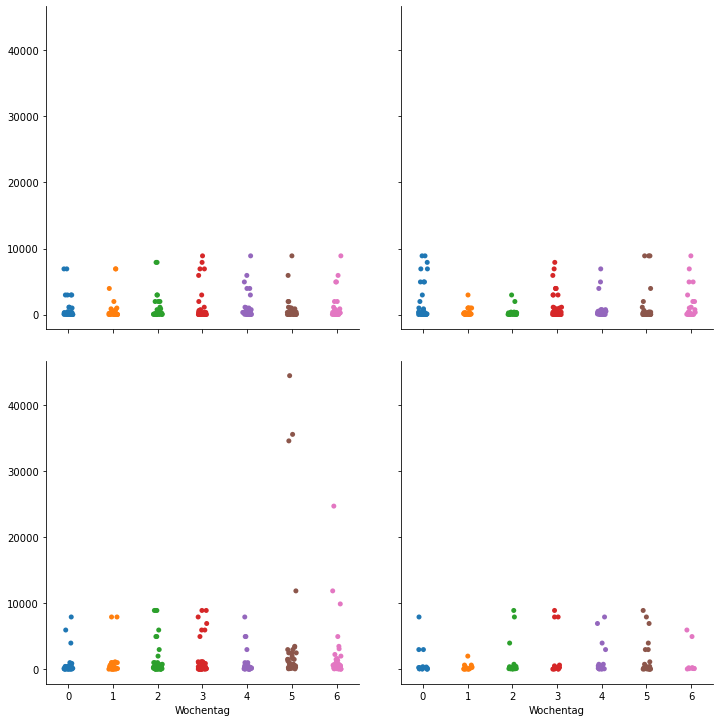

In [115]:
ax = sns.catplot(data=df, x="Wochentag", y=df["Menge"] * df["Preis"], col="Vertriebler", col_wrap=2, )
ax.tight_layout()
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle("Sales by Rep and Weekday")

In [257]:
# Save per day
for name,group in df.groupby("Datum"):
    print(name)
    group.to_excel(f"chapters/assets/datasets/sales/{name.date()}_Sales.xlsx")

2022-09-01 00:00:00
2022-09-02 00:00:00
2022-09-03 00:00:00
2022-09-04 00:00:00
2022-09-05 00:00:00
2022-09-06 00:00:00
2022-09-07 00:00:00
2022-09-08 00:00:00
2022-09-09 00:00:00
2022-09-10 00:00:00
2022-09-11 00:00:00
2022-09-12 00:00:00
2022-09-13 00:00:00
2022-09-14 00:00:00
2022-09-15 00:00:00
2022-09-16 00:00:00
2022-09-17 00:00:00
2022-09-18 00:00:00
2022-09-19 00:00:00
2022-09-20 00:00:00
2022-09-21 00:00:00
2022-09-22 00:00:00
2022-09-23 00:00:00
2022-09-24 00:00:00
2022-09-25 00:00:00
2022-09-26 00:00:00
2022-09-27 00:00:00
2022-09-28 00:00:00
2022-09-29 00:00:00
